I want to see how the pointing drift compares between algorithms and without active feedback

locked_3 = The second to last locked data comes from P=0.3, I=0,D=1.0
locked_4 = The last locked data comes from P=0.3,I=0.00005, D=1.0
ignore _alone file did not save full data for that run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import boxcar
from Packages.UpdateManager import UpdateManager
import copy
import sys
sys.path.append(r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/Plotting_Tools/Plotting_Tools')
from Plotting_Tools import set_size

In [2]:
file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-07-11/acquisition_1_unlocked/pointing_cam1_part_'
for i in range(3):
    file_name_part = file_name+str(i+1)
    cam_1_pointing_memmap = np.memmap(file_name_part,dtype='float64',mode='r',order='C')
    cam_1_pointing_memmap = cam_1_pointing_memmap.reshape(3, int(cam_1_pointing_memmap.size/3))
    if i==0:
        cam_1_pointing = copy.deepcopy(cam_1_pointing_memmap)
    else:
        cam_1_pointing = np.concatenate((cam_1_pointing,copy.deepcopy(cam_1_pointing_memmap)),axis=1)
cam_1_pointing[2,:] -= cam_1_pointing[2,:].min()

In [3]:
"""file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-04-05/pointing_cam1_locked_3'
cam_1_pointing = np.memmap(file_name,dtype='float64',mode='r',order='C')
cam_1_pointing = cam_1_pointing.reshape(3, int(cam_1_pointing.size/3))
cam_1_pointing = copy.deepcopy(cam_1_pointing)
cam_1_pointing[2,:] -= cam_1_pointing[2,:].min()"""
file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-04-05/pointing_cam1_unlocked_6'
cam_1_pointing_unlocked = np.memmap(file_name,dtype='float64',mode='r',order='C')
cam_1_pointing_unlocked = cam_1_pointing_unlocked.reshape(3, int(cam_1_pointing_unlocked.size/3))
cam_1_pointing_unlocked = copy.deepcopy(cam_1_pointing_unlocked)
cam_1_pointing_unlocked[2,:] -= cam_1_pointing_unlocked[2,:].min()

t_window_unlocked = [0,60]
t_window_unlocked_low_ind = np.argmin(np.abs(cam_1_pointing_unlocked[2,:]-t_window_unlocked[0]*60*1000))
t_window_unlocked_high_ind = np.argmin(np.abs(cam_1_pointing_unlocked[2,:]-t_window_unlocked[1]*60*1000))
t_window_unlocked_ind = [t_window_unlocked_low_ind,t_window_unlocked_high_ind]
cam_1_pointing_unlocked = cam_1_pointing_unlocked[:,t_window_unlocked_ind[0]:t_window_unlocked_ind[1]]

t_window = [0,60]
t_window_low_ind = np.argmin(np.abs(cam_1_pointing[2,:]-t_window[0]*60*1000))
t_window_high_ind = np.argmin(np.abs(cam_1_pointing[2,:]-t_window[1]*60*1000))
t_window_ind = [t_window_low_ind,t_window_high_ind]
cam_1_pointing = cam_1_pointing[:,t_window_ind[0]:t_window_ind[1]]

In [4]:
cam_1_pointing_unlocked[0:2,:].max()

1059.3894763475305

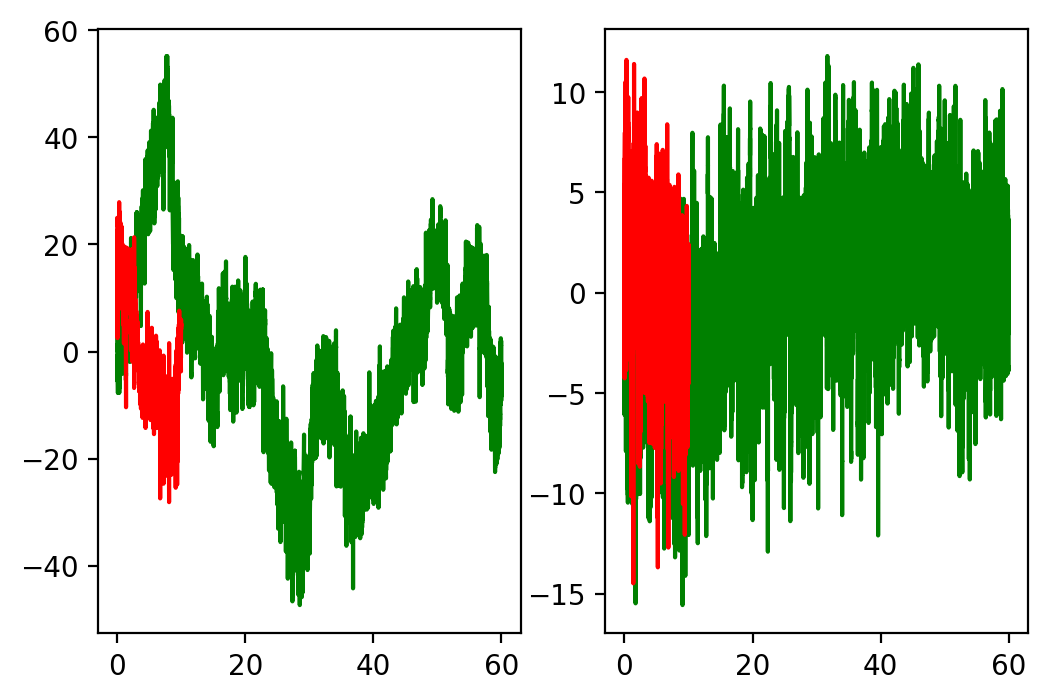

In [5]:
fig, ax = plt.subplots(1,2,dpi = 200)
plt.sca(ax[0])
plt.plot((cam_1_pointing[2,:]-cam_1_pointing[2,:].min())/1000/60, cam_1_pointing[0,:]-cam_1_pointing[0,:].mean(),'g')
plt.plot((cam_1_pointing_unlocked[2,:]-cam_1_pointing_unlocked[2,:].min())/1000/60, cam_1_pointing_unlocked[0,:]-cam_1_pointing_unlocked[0,:].mean(),'r')
plt.sca(ax[1])
plt.plot((cam_1_pointing[2,:]-cam_1_pointing[2,:].min())/1000/60, cam_1_pointing[1,:]-cam_1_pointing[1,:].mean(),'g')
plt.plot((cam_1_pointing_unlocked[2,:]-cam_1_pointing_unlocked[2,:].min())/1000/60, cam_1_pointing_unlocked[1,:]-cam_1_pointing_unlocked[1,:].mean(),'r')

In [6]:
print(np.std(cam_1_pointing_unlocked[0:2,:],axis=1))
print(np.std(cam_1_pointing[0:2,:],axis=1))

[10.02102582  3.78080916]
[17.67516975  3.81125547]


In [7]:
file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-07-11/acquisition_1_unlocked/pointing_cam2_part_'
for i in range(3):
    file_name_part = file_name+str(i+1)
    cam_2_pointing_memmap = np.memmap(file_name_part,dtype='float64',mode='r',order='C')
    cam_2_pointing_memmap = cam_2_pointing_memmap.reshape(3, int(cam_2_pointing_memmap.size/3))
    if i==0:
        cam_2_pointing = copy.deepcopy(cam_2_pointing_memmap)
    else:
        cam_2_pointing = np.concatenate((cam_2_pointing,copy.deepcopy(cam_2_pointing_memmap)),axis=1)
cam_2_pointing[2,:] -= cam_2_pointing[2,:].min()

In [8]:
"""file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-04-05/pointing_cam2_locked_4'
cam_2_pointing = np.memmap(file_name,dtype='float64',mode='r',order='C')
cam_2_pointing = cam_2_pointing.reshape(3, int(cam_2_pointing.size/3))
cam_2_pointing = copy.deepcopy(cam_2_pointing)
cam_2_pointing[2,:] -= cam_2_pointing[2,:].min()"""
file_name = r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Code/PointLock Software/LaserPointLock/Data/2023-04-05/pointing_cam2_unlocked_6'
cam_2_pointing_unlocked = np.memmap(file_name,dtype='float64',mode='r',order='C')
cam_2_pointing_unlocked = cam_2_pointing_unlocked.reshape(3, int(cam_2_pointing_unlocked.size/3))
cam_2_pointing_unlocked = copy.deepcopy(cam_2_pointing_unlocked)
cam_2_pointing_unlocked[2,:] -= cam_2_pointing_unlocked[2,:].min()

t_window_unlocked = [0,60]
t_window_unlocked_low_ind = np.argmin(np.abs(cam_2_pointing_unlocked[2,:]-t_window_unlocked[0]*60*1000))
t_window_unlocked_high_ind = np.argmin(np.abs(cam_2_pointing_unlocked[2,:]-t_window_unlocked[1]*60*1000))
t_window_unlocked_ind = [t_window_unlocked_low_ind,t_window_unlocked_high_ind]
cam_2_pointing_unlocked = cam_2_pointing_unlocked[:,t_window_unlocked_ind[0]:t_window_unlocked_ind[1]]

t_window = [0,60]
t_window_low_ind = np.argmin(np.abs(cam_2_pointing[2,:]-t_window[0]*60*1000))
t_window_high_ind = np.argmin(np.abs(cam_2_pointing[2,:]-t_window[1]*60*1000))
t_window_ind = [t_window_low_ind,t_window_high_ind]
cam_2_pointing = cam_2_pointing[:,t_window_ind[0]:t_window_ind[1]]

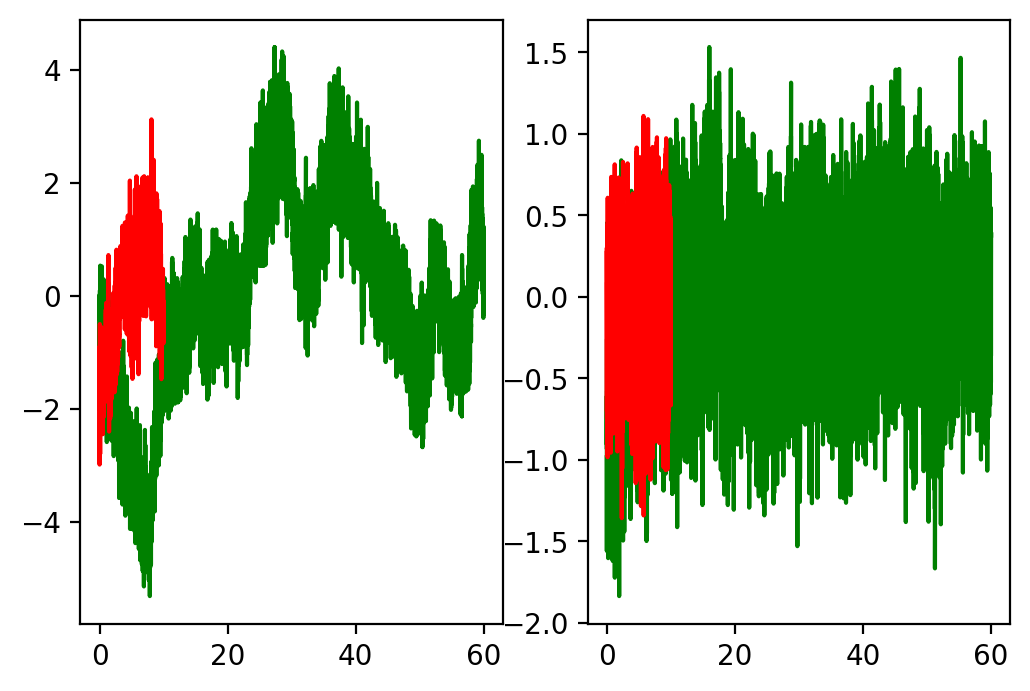

In [9]:
fig, ax = plt.subplots(1,2,dpi = 200)
plt.sca(ax[0])
plt.plot((cam_2_pointing[2,:]-cam_2_pointing[2,:].min())/1000/60, cam_2_pointing[0,:]-cam_2_pointing[0,:].mean(),'g')
plt.plot((cam_2_pointing_unlocked[2,:]-cam_2_pointing_unlocked[2,:].min())/1000/60, cam_2_pointing_unlocked[0,:]-cam_2_pointing_unlocked[0,:].mean(),'r')
plt.sca(ax[1])
plt.plot((cam_2_pointing[2,:]-cam_2_pointing[2,:].min())/1000/60, cam_2_pointing[1,:]-cam_2_pointing[1,:].mean(),'g')
plt.plot((cam_2_pointing_unlocked[2,:]-cam_2_pointing_unlocked[2,:].min())/1000/60, cam_2_pointing_unlocked[1,:]-cam_2_pointing_unlocked[1,:].mean(),'r')

In [10]:
print(np.std(cam_2_pointing_unlocked[0:2,:],axis=1))
print(np.std(cam_2_pointing[0:2,:],axis=1))

[0.81049068 0.30333088]
[1.63796099 0.38455885]


In [11]:
manager_unlock = UpdateManager()

dx1 = copy.deepcopy(cam_1_pointing_unlocked[0:2,:].transpose())
dx2 = copy.deepcopy(cam_2_pointing_unlocked[0:2,:].transpose())

dx1[:,0] -= dx1[:,0].mean()
dx1[:,1] -= dx1[:,1].mean()
dx2[:,0] -= dx2[:,0].mean()
dx2[:,1] -= dx2[:,1].mean()

t1 = cam_1_pointing_unlocked[2,:]
t2 = cam_2_pointing_unlocked[2,:]
pixel_pitch = 3.45  #um

dx1_average = []
t1_average = []
dt1 = np.min(t1[1:]-t1[0:-1])
update_time = 10*1000/55
#update_time_int = int(np.floor(update_time/dt1))
update_time_int = 1
print(1/(dt1*update_time_int), dt1)
for i in range(int(dx1.shape[0]/update_time_int)):
    dx1_average.append(np.average(dx1[i*update_time_int:(i+1)*update_time_int,:],axis=0))
    t1_average.append(np.average(t1[i*update_time_int:(i+1)*update_time_int],axis=0))
dx1_average = np.asarray(dx1_average)
t1_average = np.asarray(t1_average)

dx2_average = []
t2_average = []
dt2 = np.min(t2[1:]-t2[0:-1])
update_time = 10*1000/55
#update_time_int = int(np.floor(update_time/dt2))
update_time_int = 1
for i in range(int(dx2.shape[0]/update_time_int)):
    dx2_average.append(np.average(dx2[i*update_time_int:(i+1)*update_time_int,:],axis=0))
    t2_average.append(np.average(t2[i*update_time_int:(i+1)*update_time_int],axis=0))
dx2_average = np.asarray(dx2_average)
t2_average = np.asarray(t2_average)

dx1_average[:,0] -= dx1_average[:,0].mean()
dx1_average[:,1] -= dx1_average[:,1].mean()
dx2_average[:,0] -= dx2_average[:,0].mean()
dx2_average[:,1] -= dx2_average[:,1].mean()

#Convert to more meaningful units:
dx1_average = dx1_average*pixel_pitch  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047
f = 200*1000 # um
dx2_average = np.arctan((dx2_average*pixel_pitch)/(f))*10**6 #Convert to microradians

manager_unlock.load_data(dx1_average,dx2_average, t1_average, t2_average)

Calibration voltages shape (121,)
0.07370739403269598 13.56715989112854


In [12]:
print("The standard deviation of the dx data (in units explained above) is:", np.std(dx1,axis=0),np.std(dx2,axis=0) )

The standard deviation of the dx data (in units explained above) is: [10.02102582  3.78080916] [0.81049068 0.30333088]


In [13]:
FrequencyData = manager_unlock.frequency_data

In [14]:
Frequency_Domain = manager_unlock.frequency_domain
for i in range(2):
    FrequencyData[i] = FrequencyData[i] / (manager_unlock.t1[-1] - manager_unlock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData[i + 2] = FrequencyData[i + 2] / (
                manager_unlock.t2[-1] - manager_unlock.t2[0])  # Convert to Units of [dx]

Now, let
's plot this data
cam1_dx

/Users/glinn/opt/anaconda3/envs/PointLockAnalysis/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-15-24e7e139d991>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_1_dx", box='tight')


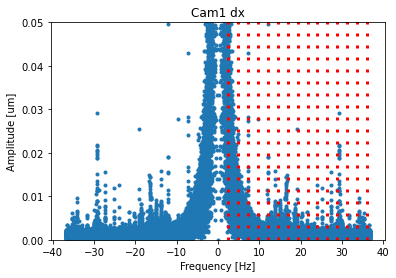

In [15]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0], np.abs(FrequencyData[0]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
n = np.arange(15)+1
Nu_0 = 2.41
#Nu_0=1.4
Harmonics = Nu_0*n
for harmonic in Harmonics:
    plt.plot([harmonic, harmonic],[0,FrequencyData[0].max()], 'r',ls=(0,(1,3)),linewidth=3)
plt.ylim(0, 0.05)
#plt.xlim(0,40)
plt.savefig("cam_1_dx", box='tight')

cam1
dy

/Users/glinn/opt/anaconda3/envs/PointLockAnalysis/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-16-5e72940802f3>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_1_dy", box='tight')


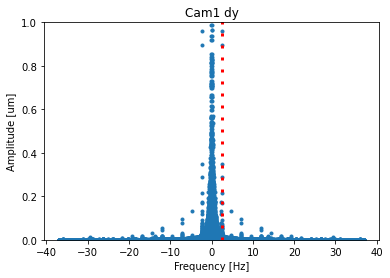

In [16]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0], np.abs(FrequencyData[1]), ".")
n = np.arange(1)+1
Nu_0 = 2.41
#Nu_0=1.2
Harmonics = Nu_0*n
for harmonic in Harmonics:
    plt.plot([harmonic, harmonic],[0,FrequencyData[1].max()], 'r',ls=(0,(1,3)),linewidth=3)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.ylim(0, 1)
#plt.xlim(0,30)
plt.title("Cam1 dy")
plt.savefig("cam_1_dy", box='tight')

cam2
dx

<ipython-input-17-349937c2abe6>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_2_dx", box='tight')


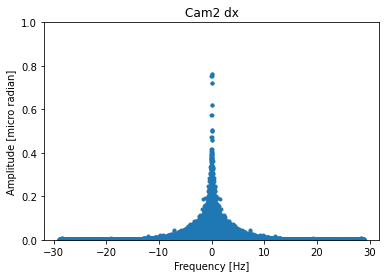

In [17]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1], np.abs(FrequencyData[2]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.ylim(0, 1)
#plt.xlim(0,35)
plt.savefig("cam_2_dx", box='tight')

cam2
dy

<ipython-input-18-8ada04415957>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_2_dy", box='tight')


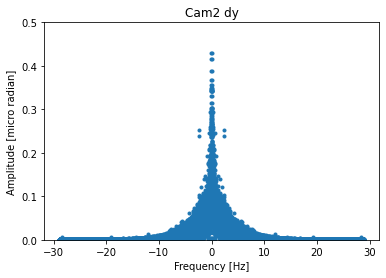

In [18]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1], np.abs(FrequencyData[3]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.ylim(0, 0.5)
#plt.xlim(0,30)
plt.savefig("cam_2_dy", box='tight')

In [19]:
manager_lock = UpdateManager()

dx1_locked = copy.deepcopy(cam_1_pointing[0:2,:].transpose())
dx2_locked = copy.deepcopy(cam_2_pointing[0:2,:].transpose())

dx1_locked[:,0] -= dx1_locked[:,0].mean()
dx1_locked[:,1] -= dx1_locked[:,1].mean()
dx2_locked[:,0] -= dx2_locked[:,0].mean()
dx2_locked[:,1] -= dx2_locked[:,1].mean()

t1_locked = cam_1_pointing[2,:]
t2_locked = cam_2_pointing[2,:]
pixel_pitch = 3.45  #um

dx1_locked_average = []
t1_locked_average = []
dt1_locked = np.min(t1[1:]-t1[0:-1])
update_time = 10*1000/55
#update_time_int = int(np.floor(update_time/dt1_locked))
update_time_int=1
for i in range(int(dx1_locked.shape[0]/update_time_int)):
    dx1_locked_average.append(np.average(dx1_locked[i*update_time_int:(i+1)*update_time_int,:],axis=0))
    t1_locked_average.append(np.average(t1_locked[i*update_time_int:(i+1)*update_time_int],axis=0))
dx1_locked_average = np.asarray(dx1_locked_average)
t1_locked_average = np.asarray(t1_locked_average)

dx2_locked_average = []
t2_locked_average = []
dt2_locked = np.min(t2[1:]-t2[0:-1])
update_time = 10*1000/55
#update_time_int = int(np.floor(update_time/dt2_locked))
update_time_int=1
for i in range(int(dx2_locked.shape[0]/update_time_int)):
    dx2_locked_average.append(np.average(dx2_locked[i*update_time_int:(i+1)*update_time_int,:],axis=0))
    t2_locked_average.append(np.average(t2_locked[i*update_time_int:(i+1)*update_time_int],axis=0))
dx2_locked_average = np.asarray(dx2_locked_average)
t2_locked_average = np.asarray(t2_locked_average)

dx1_locked_average[:,0] -= dx1_locked_average[:,0].mean()
dx1_locked_average[:,1] -= dx1_locked_average[:,1].mean()
dx2_locked_average[:,0] -= dx2_locked_average[:,0].mean()
dx2_locked_average[:,1] -= dx2_locked_average[:,1].mean()

#Convert to more meaningful units:
dx1_locked_average = dx1_locked_average*pixel_pitch  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047
f = 200*1000 # um
dx2_locked_average = np.arctan((dx2_locked_average*pixel_pitch)/(f))*10**6 #Convert to microradians

manager_lock.load_data(dx1_locked_average,dx2_locked_average, t1_locked_average, t2_locked_average)

Calibration voltages shape (121,)


In [20]:
FrequencyData_lock = manager_lock.frequency_data
Frequency_Domain_lock = manager_lock.frequency_domain
for i in range(2):
    FrequencyData_lock[i] = FrequencyData_lock[i] / (manager_lock.t1[-1] - manager_lock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData_lock[i + 2] = FrequencyData_lock[i + 2] / (
            manager_lock.t2[-1] - manager_lock.t2[0])  # Convert to Units of [dx]

Now, let
's plot this data
cam1_dx

<ipython-input-21-0767317fd8f6>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_1_dx", box='tight')


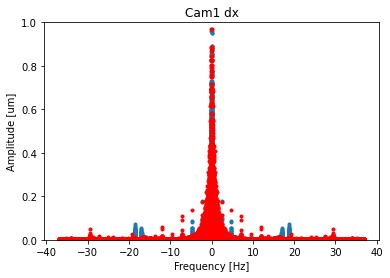

In [21]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain_lock[0], np.abs(FrequencyData_lock[0]), ".")
plt.plot(Frequency_Domain[0], np.abs(FrequencyData[0]), ".", color='r')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
plt.ylim(0, 1)
#plt.xlim(0, Frequency_Domain[0][-1])
plt.savefig("cam_1_dx", box='tight')

cam1
dy

<ipython-input-22-f7598e95a95d>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_1_dy", box='tight')


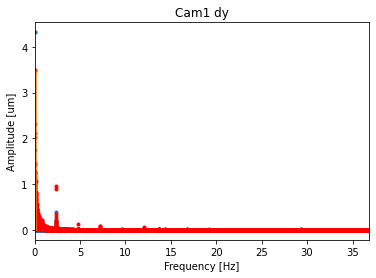

In [22]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain_lock[0], np.abs(FrequencyData_lock[1]), ".")
plt.plot(Frequency_Domain[0], np.abs(FrequencyData[1]), ".",color='r')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
nu_c = 0.125
plt.plot([nu_c,nu_c], [0,np.abs(FrequencyData[1]).max()])
#plt.ylim(0, 1)
plt.xlim(0, Frequency_Domain[0][-1])
plt.title("Cam1 dy")
plt.savefig("cam_1_dy", box='tight')

cam2
dx

<ipython-input-23-25941ed4c143>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_2_dx", box='tight')


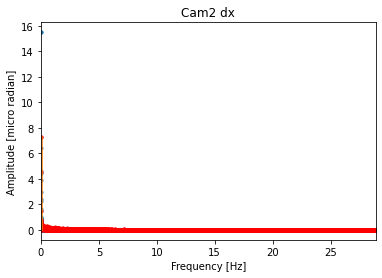

In [23]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain_lock[1], np.abs(FrequencyData_lock[2]), ".")
plt.plot(Frequency_Domain[1], np.abs(FrequencyData[2]), ".", color='r')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.plot([nu_c,nu_c], [0,np.abs(FrequencyData[2]).max()])
#plt.ylim(0, 1)
plt.xlim(0, Frequency_Domain[1][-1])
plt.savefig("cam_2_dx", box='tight')

cam2
dy

<ipython-input-24-a4358869682d>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cam_2_dy", box='tight')


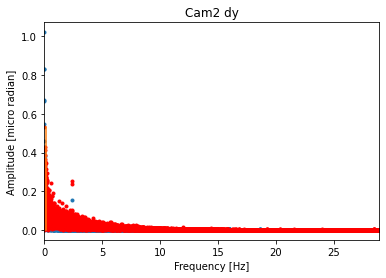

In [24]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain_lock[1], np.abs(FrequencyData_lock[3]), ".")
plt.plot(Frequency_Domain[1], np.abs(FrequencyData[3]), ".",color="r")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.plot([nu_c,nu_c], [0,np.abs(FrequencyData[3]).max()])
#plt.ylim(0, 0.5)
plt.xlim(0, Frequency_Domain[1][-1])
plt.savefig("cam_2_dy", box='tight')

-97.08344384305822 96.25146133811658
[-50, 0, 50]


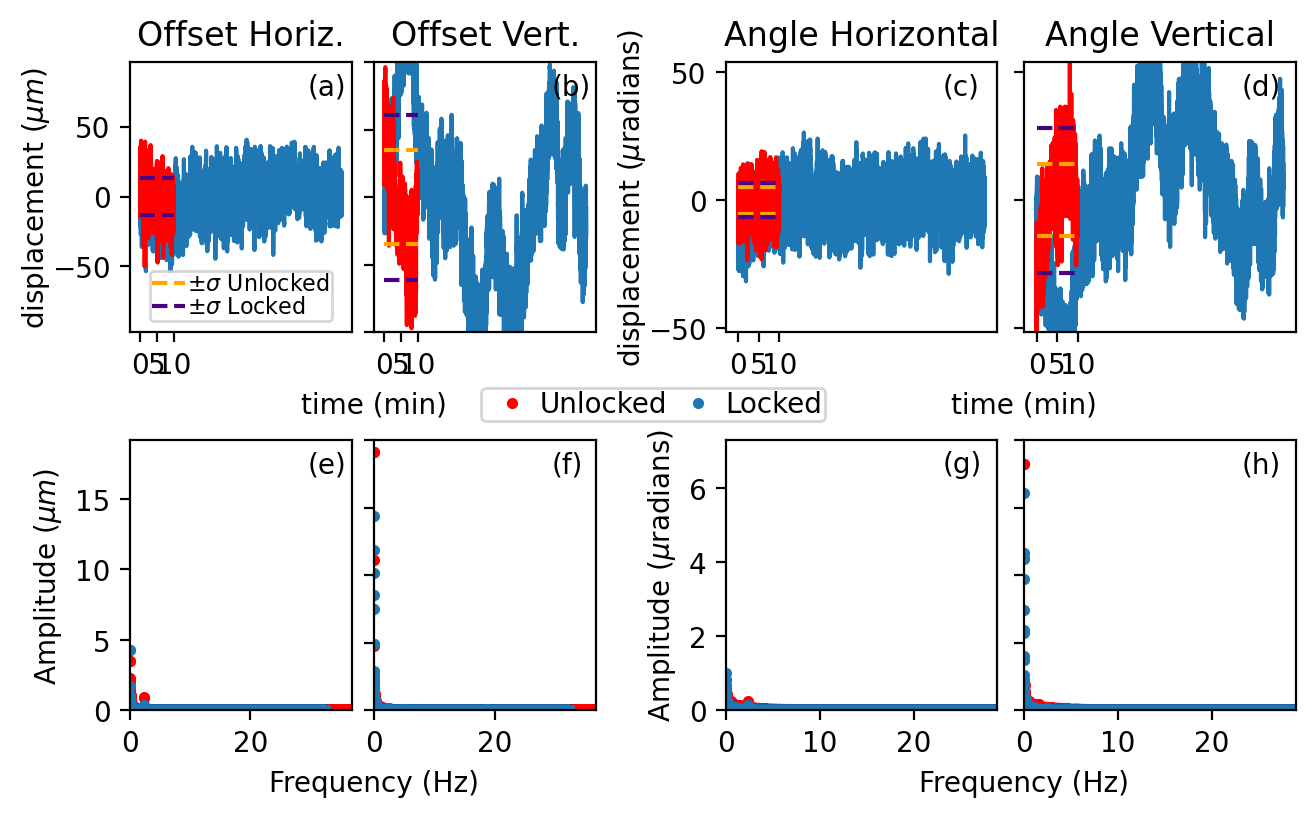

In [25]:
fig = plt.figure(dpi=200, figsize=set_size('preprint'))
T = 0.93
B = 0.12
R = 0.99
L = 0.09
grid1 = plt.GridSpec(2,2,left=L,right=0.45,top=T,bottom=B,wspace=0.1,hspace=0.4)
grid2 = plt.GridSpec(2,2,left=0.55,right=R,top=T,bottom=B,wspace=0.1,hspace=0.4)
ax = []
ax.append(fig.add_subplot(grid1[0,0]))
ax.append(fig.add_subplot(grid1[0,1]))
ax.append(fig.add_subplot(grid2[0,0]))
ax.append(fig.add_subplot(grid2[0,1]))

ax.append(fig.add_subplot(grid1[1,0]))
ax.append(fig.add_subplot(grid1[1,1]))
ax.append(fig.add_subplot(grid2[1,0]))
ax.append(fig.add_subplot(grid2[1,1]))

ax[1].plot((t1_locked_average-t1_locked_average.min())/60/1000,dx1_locked_average[:,0])
ax[1].plot((t1_average-t1_average.min())/60/1000,dx1_average[:,0], color='r')
ax[1].plot([0,10],[dx1_average[:,0].std(),dx1_average[:,0].std()],color='orange',ls='--')
ax[1].plot([0,10],[-dx1_average[:,0].std(),-dx1_average[:,0].std()],color='orange',ls='--')
ax[1].plot([0,10],[dx1_locked_average[:,0].std(),dx1_locked_average[:,0].std()],color='indigo',ls='--')
ax[1].plot([0,10],[-dx1_locked_average[:,0].std(),-dx1_locked_average[:,0].std()],color='indigo',ls='--')

ax[0].plot((t1_locked_average-t1_locked_average.min())/60/1000,dx1_locked_average[:,1])
ax[0].plot((t1_average-t1_average.min())/60/1000,dx1_average[:,1], color='r')
ax[0].plot([0,10],[dx1_average[:,1].std(),dx1_average[:,1].std()],color='orange',ls='--')
ax[0].plot([0,10],[-dx1_average[:,1].std(),-dx1_average[:,1].std()],color='orange',ls='--')
ax[0].plot([0,10],[dx1_locked_average[:,1].std(),dx1_locked_average[:,1].std()],color='indigo',ls='--')
ax[0].plot([0,10],[-dx1_locked_average[:,1].std(),-dx1_locked_average[:,1].std()],color='indigo',ls='--')

plt.sca(ax[0])
custom_lines = [plt.Line2D([],[],color='orange',ls='--'),plt.Line2D([],[],color='indigo',ls='--')]
plt.legend(custom_lines,[r'$\pm\sigma$ Unlocked', r'$\pm\sigma$ Locked'], labelspacing=0, handlelength=1.5, handletextpad=0.1,borderpad=0.1,columnspacing=0.1,fontsize=8, loc='lower center')

ymax = np.max((dx1_average[:,0].max(), dx1_average[:,1].max()))
ymin = np.min((dx1_average[:,0].min(), dx1_average[:,1].min()))
print(ymin, ymax)
ax[1].set_ylim(ymin,ymax)
ax[0].set_ylim(ymin,ymax)
yticks = ax[1].get_yticks()
plt.sca(ax[1])
plt.yticks(yticks, '')
plt.sca(ax[0])
plt.ylabel(r'displacement $(\mu m)$',labelpad=0)
ax[0].set_title('Offset Horiz.')
ax[1].set_title('Offset Vert.')

ax[1].set_xlabel('time (min)', x=0)

ax[3].plot((t2_locked_average-t2_locked_average.min())/60/1000,dx2_locked_average[:,0])
ax[3].plot((t2_average-t2_average.min())/60/1000,dx2_average[:,0], color='r')
ax[3].plot([0,10],[dx2_average[:,0].std(),dx2_average[:,0].std()],color='orange',ls='--')
ax[3].plot([0,10],[-dx2_average[:,0].std(),-dx2_average[:,0].std()],color='orange',ls='--')
ax[3].plot([0,10],[dx2_locked_average[:,0].std(),dx2_locked_average[:,0].std()],color='indigo',ls='--')
ax[3].plot([0,10],[-dx2_locked_average[:,0].std(),-dx2_locked_average[:,0].std()],color='indigo',ls='--')
ax[2].set_title('Angle Horizontal')

ax[2].plot((t2_locked_average-t2_locked_average.min())/60/1000,dx2_locked_average[:,1])
ax[2].plot((t2_average-t2_average.min())/60/1000,dx2_average[:,1], color='r')
ax[2].plot([0,10],[dx2_average[:,1].std(),dx2_average[:,1].std()],color='orange',ls='--')
ax[2].plot([0,10],[-dx2_average[:,1].std(),-dx2_average[:,1].std()],color='orange',ls='--')
ax[2].plot([0,10],[dx2_locked_average[:,1].std(),dx2_locked_average[:,1].std()],color='indigo',ls='--')
ax[2].plot([0,10],[-dx2_locked_average[:,1].std(),-dx2_locked_average[:,1].std()],color='indigo',ls='--')
ax[3].set_title('Angle Vertical')

ymax = np.max((dx2_average[:,0].max(), dx2_average[:,1].max()))
ymin = np.min((dx2_average[:,0].min(), dx2_average[:,1].min()))
ax[2].set_ylim(ymin,ymax)
ax[3].set_ylim(ymin,ymax)
yticks = [-50,0,50]
plt.sca(ax[3])
print(yticks)
plt.yticks(yticks, '')
plt.sca(ax[2])
plt.ylabel(r'displacement $(\mu \mathrm{radians})$', labelpad=0)
ax[3].set_xlabel('time (min)', x=0)

ax[0].set_xticks([0,5,10])
ax[1].set_xticks([0,5,10])
ax[2].set_xticks([0,5,10])
ax[3].set_xticks([0,5,10])

plt.sca(ax[5])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[0])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[0][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[0][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[0])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[0][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[0][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
ymax = np.max(np.abs(FrequencyData_avg[:]))
ymin = np.min(np.abs(FrequencyData_avg[:]))
plt.xlabel("Frequency (Hz)",x=0)

plt.xlim(0, Frequency_Domain[0][-1])

plt.sca(ax[4])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[1])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[1][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[0][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[1])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[1][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[0][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.ylabel("Amplitude $(\mu m)$")

plt.xlim(0, Frequency_Domain[0][-1])

ax[4].set_ylim(ymin,ymax)
ax[5].set_ylim(ymin,ymax)
yticks = ax[5].get_yticks()
plt.sca(ax[5])
plt.yticks(yticks, '')

plt.sca(ax[7])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[2])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[2][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[1][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[2])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[2][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[1][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.xlim(0, Frequency_Domain[1][-1])
ymax = np.max(np.abs(FrequencyData_avg[:]))
ymin = np.min(np.abs(FrequencyData_avg[:]))
plt.xlabel("Frequency (Hz)",x=0)

plt.sca(ax[6])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[3])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[3][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[1][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[3])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[3][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[1][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.ylabel("Amplitude $(\mu \mathrm{radians})$")
plt.xlim(0, Frequency_Domain[1][-1])

plt.legend(['Unlocked', 'Locked'], ncol=2,loc=(-0.9,1.07),labelspacing=0, handletextpad=0,borderpad=0.1,columnspacing=0.1)

ax[6].set_ylim(ymin,ymax)
ax[7].set_ylim(ymin,ymax)
yticks = ax[6].get_yticks()
plt.sca(ax[7])
plt.yticks(yticks, '')

ax[0].annotate('(a)', (0.8,0.88),xycoords='axes fraction')
ax[1].annotate('(b)', (0.8,0.88),xycoords='axes fraction')
ax[2].annotate('(c)', (0.8,0.88),xycoords='axes fraction')
ax[3].annotate('(d)', (0.8,0.88),xycoords='axes fraction')
ax[4].annotate('(e)', (0.8,0.88),xycoords='axes fraction')
ax[5].annotate('(f)', (0.8,0.88),xycoords='axes fraction')
ax[6].annotate('(g)', (0.8,0.88),xycoords='axes fraction')
ax[7].annotate('(h)', (0.8,0.88),xycoords='axes fraction')

plt.savefig(r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Thesis/Point_Lock_Characterization.pdf')

-163.43232669061106 190.4542955951293
[-50, 0, 50]
32.6662043371207
15.508312910075476


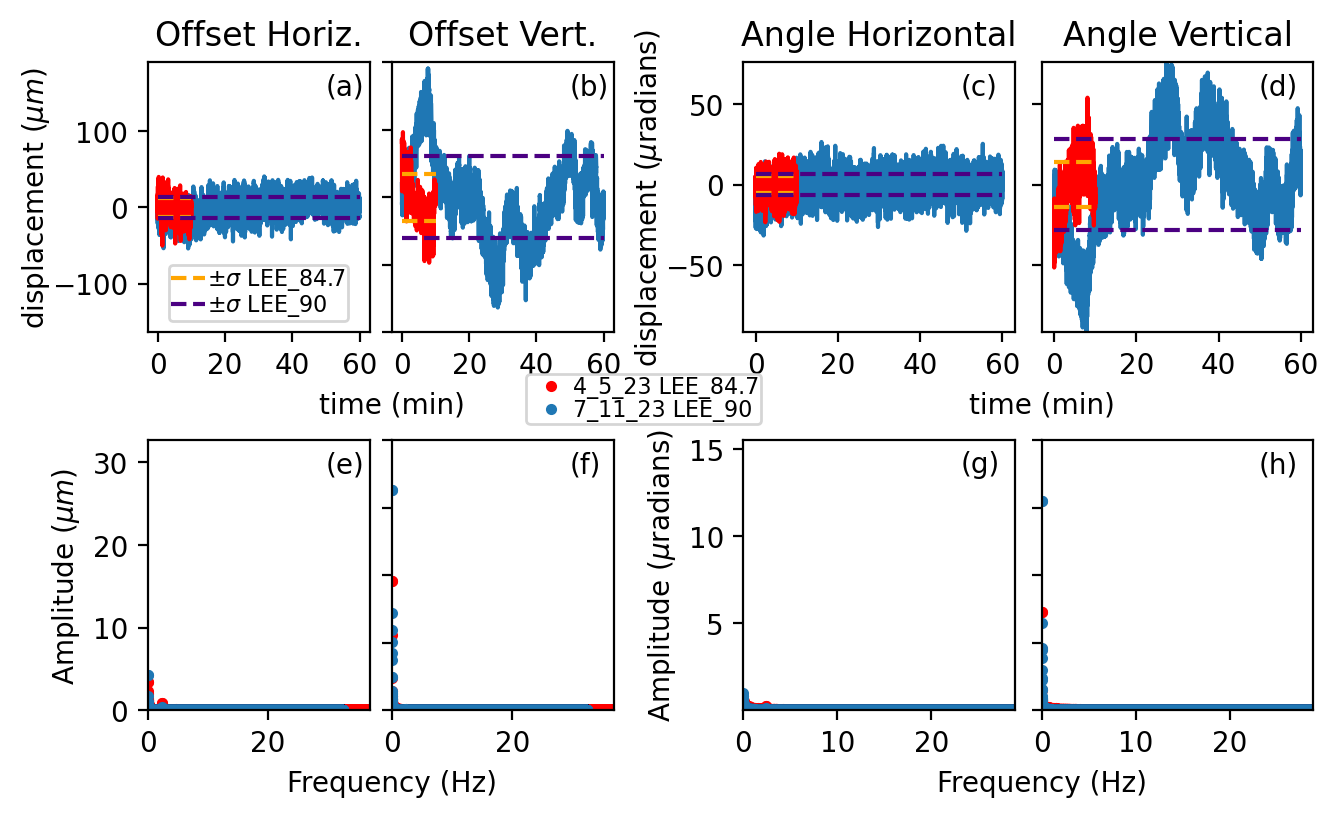

In [38]:
fig = plt.figure(dpi=200, figsize=set_size('preprint'))
T = 0.93
B = 0.12
R = 0.99
L = 0.09
grid1 = plt.GridSpec(2,2,left=L,right=0.45,top=T,bottom=B,wspace=0.1,hspace=0.4)
grid2 = plt.GridSpec(2,2,left=0.55,right=R,top=T,bottom=B,wspace=0.1,hspace=0.4)
ax = []
ax.append(fig.add_subplot(grid1[0,0]))
ax.append(fig.add_subplot(grid1[0,1]))
ax.append(fig.add_subplot(grid2[0,0]))
ax.append(fig.add_subplot(grid2[0,1]))

ax.append(fig.add_subplot(grid1[1,0]))
ax.append(fig.add_subplot(grid1[1,1]))
ax.append(fig.add_subplot(grid2[1,0]))
ax.append(fig.add_subplot(grid2[1,1]))

ax[1].plot((t1_locked_average-t1_locked_average.min())/60/1000,dx1_locked_average[:,0])
ax[1].plot((t1_average-t1_average.min())/60/1000,dx1_average[:,0], color='r')
ax[1].plot([0,10],[dx1_average[:,0].std(),dx1_average[:,0].std()],color='orange',ls='--')
ax[1].plot([0,10],[-dx1_average[:,0].std(),-dx1_average[:,0].std()],color='orange',ls='--')
ax[1].plot([0,60],[dx1_locked_average[:,0].std(),dx1_locked_average[:,0].std()],color='indigo',ls='--')
ax[1].plot([0,60],[-dx1_locked_average[:,0].std(),-dx1_locked_average[:,0].std()],color='indigo',ls='--')

ax[0].plot((t1_locked_average-t1_locked_average.min())/60/1000,dx1_locked_average[:,1])
ax[0].plot((t1_average-t1_average.min())/60/1000,dx1_average[:,1], color='r')
ax[0].plot([0,10],[dx1_average[:,1].std(),dx1_average[:,1].std()],color='orange',ls='--')
ax[0].plot([0,10],[-dx1_average[:,1].std(),-dx1_average[:,1].std()],color='orange',ls='--')
ax[0].plot([0,60],[dx1_locked_average[:,1].std(),dx1_locked_average[:,1].std()],color='indigo',ls='--')
ax[0].plot([0,60],[-dx1_locked_average[:,1].std(),-dx1_locked_average[:,1].std()],color='indigo',ls='--')

plt.sca(ax[0])
custom_lines = [plt.Line2D([],[],color='orange',ls='--'),plt.Line2D([],[],color='indigo',ls='--')]
plt.legend(custom_lines,[r'$\pm\sigma$ LEE_84.7', r'$\pm\sigma$ LEE_90'], labelspacing=0, handlelength=1.5, handletextpad=0.1,borderpad=0.1,columnspacing=0.1,fontsize=8, loc='lower center')

ymax = np.max((dx1_locked_average[:,0].max(), dx1_locked_average[:,1].max()))
ymin = np.min((dx1_locked_average[:,0].min(), dx1_locked_average[:,1].min()))
print(ymin, ymax)
ax[1].set_ylim(ymin,ymax)
ax[0].set_ylim(ymin,ymax)
yticks = ax[1].get_yticks()
plt.sca(ax[1])
plt.yticks(yticks, '')
plt.sca(ax[0])
plt.ylabel(r'displacement $(\mu m)$',labelpad=0)
ax[0].set_title('Offset Horiz.')
ax[1].set_title('Offset Vert.')

ax[1].set_xlabel('time (min)', x=0)

ax[3].plot((t2_locked_average-t2_locked_average.min())/60/1000,dx2_locked_average[:,0])
ax[3].plot((t2_average-t2_average.min())/60/1000,dx2_average[:,0], color='r')
ax[3].plot([0,10],[dx2_average[:,0].std(),dx2_average[:,0].std()],color='orange',ls='--')
ax[3].plot([0,10],[-dx2_average[:,0].std(),-dx2_average[:,0].std()],color='orange',ls='--')
ax[3].plot([0,60],[dx2_locked_average[:,0].std(),dx2_locked_average[:,0].std()],color='indigo',ls='--')
ax[3].plot([0,60],[-dx2_locked_average[:,0].std(),-dx2_locked_average[:,0].std()],color='indigo',ls='--')
ax[2].set_title('Angle Horizontal')

ax[2].plot((t2_locked_average-t2_locked_average.min())/60/1000,dx2_locked_average[:,1])
ax[2].plot((t2_average-t2_average.min())/60/1000,dx2_average[:,1], color='r')
ax[2].plot([0,10],[dx2_average[:,1].std(),dx2_average[:,1].std()],color='orange',ls='--')
ax[2].plot([0,10],[-dx2_average[:,1].std(),-dx2_average[:,1].std()],color='orange',ls='--')
ax[2].plot([0,60],[dx2_locked_average[:,1].std(),dx2_locked_average[:,1].std()],color='indigo',ls='--')
ax[2].plot([0,60],[-dx2_locked_average[:,1].std(),-dx2_locked_average[:,1].std()],color='indigo',ls='--')
ax[3].set_title('Angle Vertical')

ymax = np.max((dx2_locked_average[:,0].max(), dx2_locked_average[:,1].max()))
ymin = np.min((dx2_locked_average[:,0].min(), dx2_locked_average[:,1].min()))
ax[2].set_ylim(ymin,ymax)
ax[3].set_ylim(ymin,ymax)
yticks = [-50,0,50]
plt.sca(ax[3])
print(yticks)
plt.yticks(yticks, '')
plt.sca(ax[2])
plt.ylabel(r'displacement $(\mu \mathrm{radians})$', labelpad=0)
ax[3].set_xlabel('time (min)', x=0)

ax[0].set_xticks([0,20,40,60])
ax[1].set_xticks([0,20,40,60])
ax[2].set_xticks([0,20,40,60])
ax[3].set_xticks([0,20,40,60])

plt.sca(ax[5])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[0])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[0][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[0][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[0])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[0][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[0][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
ymax = np.max(np.abs(FrequencyData_lock_avg[:]))
ymin = np.min(np.abs(FrequencyData_lock_avg[:]))
plt.xlabel("Frequency (Hz)",x=0)
print(ymax)
plt.xlim(0, Frequency_Domain[0][-1])

plt.sca(ax[4])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[1])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[1][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[0][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[1])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[1][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[0][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.ylabel("Amplitude $(\mu m)$")

plt.xlim(0, Frequency_Domain[0][-1])

ax[4].set_ylim(ymin,ymax)
ax[5].set_ylim(ymin,ymax)
yticks = ax[5].get_yticks()
plt.sca(ax[5])
plt.yticks(yticks, '')

plt.sca(ax[7])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[2])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[2][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[1][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[2])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[2][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[1][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.xlim(0, Frequency_Domain[1][-1])
ymax = np.max(np.abs(FrequencyData_lock_avg[:]))
ymin = np.min(np.abs(FrequencyData_lock_avg[:]))
plt.xlabel("Frequency (Hz)",x=0)
print(ymax)
plt.sca(ax[6])
N = 1
FrequencyData_lock_avg = []
Frequency_Domain_lock_avg = []
for i in range(int(len(FrequencyData_lock[3])/N)):
    FrequencyData_lock_avg.append(np.average(FrequencyData_lock[3][i*N:(i+1)*N]))
    Frequency_Domain_lock_avg.append(np.average(Frequency_Domain_lock[1][i*N:(i+1)*N]))
FrequencyData_avg = []
Frequency_Domain_avg = []
for i in range(int(len(FrequencyData[3])/N)):
    FrequencyData_avg.append(np.average(FrequencyData[3][i*N:(i+1)*N]))
    Frequency_Domain_avg.append(np.average(Frequency_Domain[1][i*N:(i+1)*N]))

plt.plot(Frequency_Domain_avg, np.abs(FrequencyData_avg),'.', color='r')
plt.plot(Frequency_Domain_lock_avg, np.abs(FrequencyData_lock_avg),'.')
plt.ylabel("Amplitude $(\mu \mathrm{radians})$")
plt.xlim(0, Frequency_Domain[1][-1])

plt.legend(['4_5_23 LEE_84.7', '7_11_23 LEE_90'], fontsize=8, ncol=1,loc=(-0.8,1.06),labelspacing=0, handletextpad=0,borderpad=0.1,columnspacing=0.1)

ax[6].set_ylim(ymin,ymax)
ax[7].set_ylim(ymin,ymax)
yticks = ax[6].get_yticks()
plt.sca(ax[7])
plt.yticks(yticks, '')

ax[0].annotate('(a)', (0.8,0.88),xycoords='axes fraction')
ax[1].annotate('(b)', (0.8,0.88),xycoords='axes fraction')
ax[2].annotate('(c)', (0.8,0.88),xycoords='axes fraction')
ax[3].annotate('(d)', (0.8,0.88),xycoords='axes fraction')
ax[4].annotate('(e)', (0.8,0.88),xycoords='axes fraction')
ax[5].annotate('(f)', (0.8,0.88),xycoords='axes fraction')
ax[6].annotate('(g)', (0.8,0.88),xycoords='axes fraction')
ax[7].annotate('(h)', (0.8,0.88),xycoords='axes fraction')

plt.savefig(r'/Users/glinn/Google Drive (anli2171@colorado.edu)/Dessau Lab/Thesis/Point_Lock_Characterization.pdf')

In [27]:
STOP OLD DATA

SyntaxError: invalid syntax (<ipython-input-27-c1d1ac2f6cd9>, line 1)

First, we should analyze some unlocked data:

In [ ]:
manager_unlock = UpdateManager()


dx = np.loadtxt('Data/2020-08-28Measure_dx', dtype=float)
t1 = np.loadtxt('Data/2020-08-28Measure_t1', dtype=float)
t2 = np.loadtxt('Data/2020-08-28Measure_t2', dtype=float)

"""
dx = np.loadtxt('Data/2020-09-03_Measure_dx', dtype=float)
t1 = np.loadtxt('Data/2020-09-03_Measure_t1', dtype=float)
t2 = np.loadtxt('Data/2020-09-03_Measure_t2', dtype=float)
"""

#Convert to more meaningful units:
dx[:,0] = dx[:,0]*5.2  #Convert to um
dx[:,1] = dx[:,1]*5.2  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via 
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047 
f = 200*1000 # um
dx[:,2] = np.arctan((dx[:,2]*5.2)/(f)) #Convert to radians
dx[:,3] = np.arctan((dx[:,3]*5.2)/(f))  #Convert to radians

manager_unlock.load_data(dx[:,0:2],dx[:,2:], t1, t2)

In [ ]:
manager_unlock.dx.shape

In [ ]:
print("The standard deviation of the dx data (in units explained above) is:", manager_unlock.standard_deviation)

In [ ]:
fig, ax = plt.subplots(2,2,dpi=200, gridspec_kw={'hspace':0.3,'wspace':0.3})
ax[0,0].plot(t1/3600,dx[:,0])
ax[0,1].plot(t1/3600,dx[:,1])
ax[1,0].plot(t2/3600,dx[:,2])
ax[1,1].plot(t2/3600,dx[:,3])

Let us look in the frequency domain as well:

In [ ]:
FrequencyData = manager_unlock.frequency_data

In [ ]:
Frequency_Domain = manager_unlock.frequency_domain

In [ ]:
for i in range(2):
    FrequencyData[i] = FrequencyData[i]/(manager_unlock.t1[-1]-manager_unlock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData[i+2] = FrequencyData[i+2]/(manager_unlock.t2[-1]-manager_unlock.t2[0])  # Convert to Units of [dx]

Now, let's plot this data

cam1_dx

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[0]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
plt.ylim(0,6)
plt.savefig("cam_1_dx", box='tight')

cam1 dy

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[1]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.ylim(0,3)
plt.title("Cam1 dy")
plt.savefig("cam_1_dy", box='tight')

cam2 dx

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[2])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.ylim(0,6)
plt.savefig("cam_2_dx", box='tight')

cam2 dy

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[3])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.ylim(0,3)
plt.savefig("cam_2_dy", box='tight')

Now, let us compare this to some locked data:

In [ ]:
manager_lock = UpdateManager()

dx = np.loadtxt('Data/2020-09-03_Locked_Vis_dx', dtype=float)
t1 = np.loadtxt('Data/2020-09-03_Locked_Vis_t1', dtype=float)
t2 = np.loadtxt('Data/2020-09-03_Locked_Vis_t2', dtype=float)

#Convert to more meaningful units:
dx[:,0] = dx[:,0]*5.2  #Convert to um
dx[:,1] = dx[:,1]*5.2  #Convert to um
# Convert the drift of the focal spot to angular drift [radians] via 
# eqn. 2 of  Appl. Sci. 2020, 10(11), 4047; https://doi.org/10.3390/app10114047 
f = 200*1000 # um
dx[:,2] = np.arctan((dx[:,2]*5.2)/(f)) #Convert to radians
dx[:,3] = np.arctan((dx[:,3]*5.2)/(f))  #Convert to radians

manager_lock.load_data(dx, t1, t2)

In [ ]:
print("The standard deviation of the dx data (in units explained above) is:", manager_lock.standard_deviation)

Let us look in the frequency domain as well:

In [ ]:
FrequencyData = manager_lock.frequency_data

In [ ]:
Frequency_Domain = manager_lock.frequency_domain

In [ ]:
for i in range(2):
    FrequencyData[i] = FrequencyData[i]/(manager_lock.t1[-1]-manager_lock.t1[0])  # Convert to Units of [dx]
for i in range(2):
    FrequencyData[i+2] = FrequencyData[i+2]/(manager_lock.t2[-1]-manager_lock.t2[0])  # Convert to Units of [dx]

Now, let's plot this data

cam1_dx

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[0]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dx")
plt.ylim(0,6)
plt.savefig("cam_1_dx Locked", box='tight')

cam1 dy

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[0],np.abs(FrequencyData[1]), ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [um]")
plt.title("Cam1 dy")
plt.ylim(0,3)
plt.savefig("cam_1_dy Locked", box='tight')

cam2 dx

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[2])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dx")
plt.ylim(0,6)
plt.savefig("cam_2_dx Locked", box='tight')

cam2 dy

In [ ]:
fig, ax = plt.subplots()
plt.plot(Frequency_Domain[1],np.abs(FrequencyData[3])*10**6, ".")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [micro radian]")
plt.title("Cam2 dy")
plt.ylim(0,3)
plt.savefig("cam_2_dy Locked", box='tight')